## Projeto 3 Modelagem matemático-computacional - 2º semestre 2020, Professor Luciano da F. Costa 

### Visualização e solução de equações diferenciais


In [7]:
import matplotlib.pyplot as plt
import pylab as p
import numpy as np

In [6]:
def dMdt(x,t=0,a=1):
    return a*x
def dLdt(x, t=0,a = 1,N = 1):
    return a*x*(1-(x/N))
def dLV_dt(X, t=0):
    a = 1;b = 1;c = 1;d=1;
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

### Malthusiano

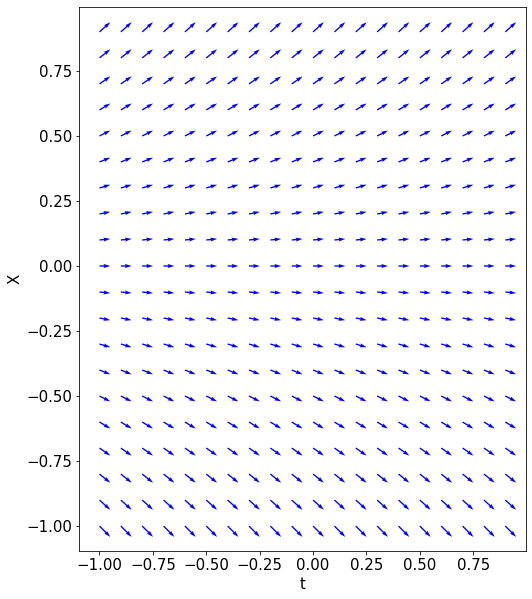

In [4]:
x,t = np.meshgrid(np.arange(-1, 1, .1), np.arange(-1, 1, .1))

deltat = 0.1
z = dMdt(x)*deltat

fig, axs = plt.subplots(figsize = (8,10))

axs.quiver(t,x,deltat,z, color = 'blue')
axs.set_xlabel('t', fontsize = 15)
axs.set_ylabel('X', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Logístico

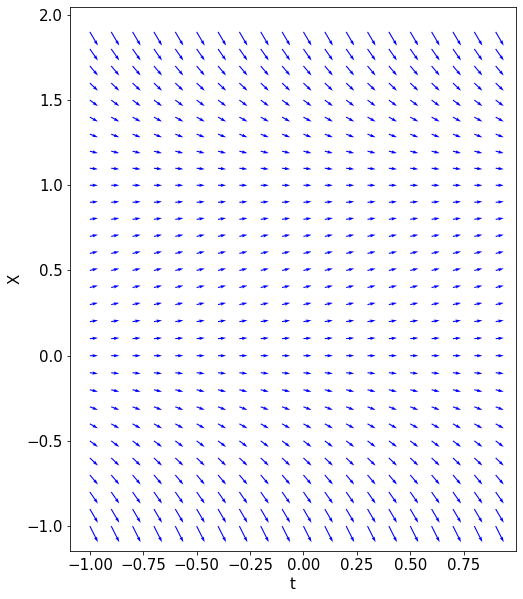

In [5]:
x,t = np.meshgrid(np.arange(-1, 2, .1), np.arange(-1, 1, .1))

deltat = 0.1
z = dLdt(x)*deltat

fig, axs = plt.subplots(figsize = (8,10))

axs.quiver(t,x,deltat,z, color = 'blue')
axs.set_xlabel('t', fontsize = 15)
axs.set_ylabel('X', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Lodka-Volterra

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text yticklabel objects>)

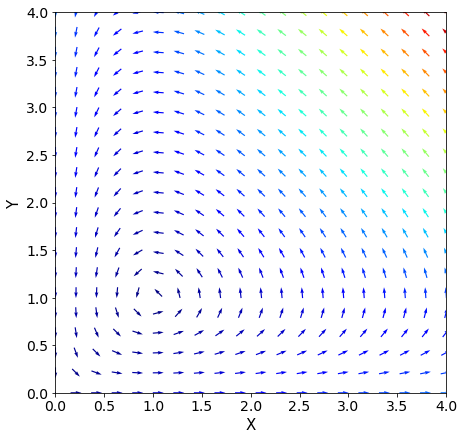

In [6]:
fig, axs = p.subplots(figsize = (7,7))

ymax = 4 # p.ylim(ymin=0)[1]
xmax = 4 # p.xlim(xmin=0)[1]

n_points = 20

x = np.linspace(0,4,n_points)
y = np.linspace(0,4,n_points)

x1,y1 = np.meshgrid(x,y)
dx1, dy1 = dLV_dt([x1,y1])

M = np.hypot(dx1,dy1)
M[M==0] = 1
dx1 = dx1/M; dy1 = dy1/M

axs.set_xlabel('X', fontsize = 15)
axs.set_ylabel('Y', fontsize = 15)


axs.quiver(x1,y1,dx1,dy1,M, pivot='mid', cmap = p.cm.jet)
p.xlim(0,4)
p.ylim(0,4)

p.xticks(fontsize = 14)
p.yticks(fontsize = 14)

### Euler's method

In [4]:
def euler_method(y0, g, t0, tf, n):
    t0 = 0
    tf = 10
    h = (tf-t0)/n
    y = np.zeros(n)
    x = np.zeros(n)
    y[0] = y0
    x[0] = 0
    for i in range(n-1):
        y[i+1] = y[i] + h*g(y[i], i)
        x[i+1] = x[i] + h
    return y

#### Logístico

Entre com o # de pontos iniciais: 10


Entre com os 10 pontos: 


x0 =  0
x0 =  0.1
x0 =  0.25
x0 =  0.5
x0 =  0.75
x0 =  1
x0 =  1.25
x0 =  1.5
x0 =  1.75
x0 =  2


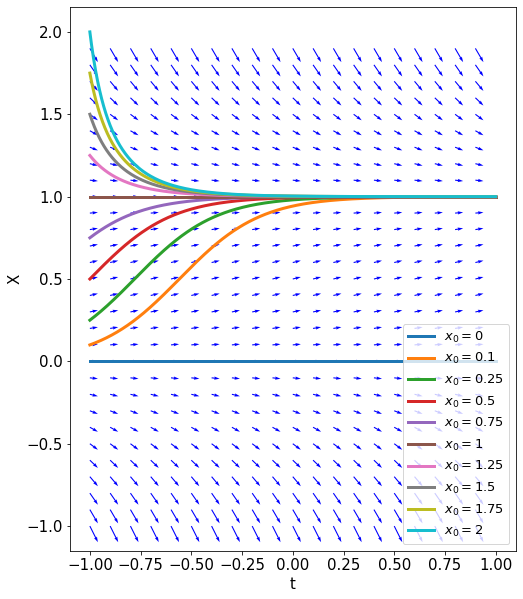

In [10]:
inp = input('Entre com o # de pontos iniciais:')
y0 = []

print('Entre com os {} pontos: '.format(inp))
for i in range(int(inp)):
    aux = input('x0 = ')
    y0.append(aux)

y = [euler_method(i,dLdt,-1,1,1000) for i in y0]


fig, axs = plt.subplots(figsize = (8,10))


for x,x0 in zip(y,y0):
    axs.plot(np.linspace(-1,1,len(x)), x, linewidth = 3, label = '$x_0 = {}$'.format(x0))

x,t = np.meshgrid(np.arange(-1, 2, .1), np.arange(-1, 1, .1))

deltat = 0.1
z = dLdt(x,t)*deltat

axs.quiver(t,x,deltat,z, color = 'blue')
axs.set_xlabel('t', fontsize = 15)
axs.set_ylabel('X', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 13)
plt.show()

### Malthusiano

Entre com o # de pontos iniciais: 5


Entre com os 5 pontos: 


x0 =  0.1
x0 =  0.2
x0 =  0.3
x0 =  0.4
x0 =  0.5


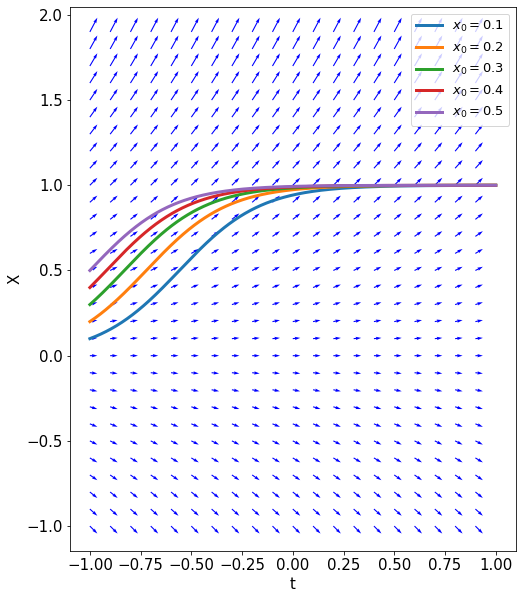

In [11]:
inp = input('Entre com o # de pontos iniciais:')
y0 = []

print('Entre com os {} pontos: '.format(inp))
for i in range(int(inp)):
    aux = input('x0 = ')
    y0.append(aux)

y = [euler_method(i,dLdt,-1,1,1000) for i in y0]


fig, axs = plt.subplots(figsize = (8,10))


for x,x0 in zip(y,y0):
    axs.plot(np.linspace(-1,1,len(x)), x, linewidth = 3, label = '$x_0 = {}$'.format(x0))

x,t = np.meshgrid(np.arange(-1, 2, .1), np.arange(-1, 1, .1))

deltat = 0.1
z = dMdt(x,t)*deltat

axs.quiver(t,x,deltat,z, color = 'blue')
axs.set_xlabel('t', fontsize = 15)
axs.set_ylabel('X', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 13)
plt.show()